<a href="https://colab.research.google.com/github/susandong/w266_final_project_game_sentiment/blob/master/w266_Final_Project_Game_Review_Sentiment_Analysis_Aspect_Extraction_1116.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project: Game Review Sentiment Analysis Aspect Extraction

* Can we use sentiment analysis score to predict the active user base for video games over time

## Dataset: 
* Game Review: twitter/reddit/discord/steam reviews
* active user base: steam

## Algorithm: 
* Baseline(logistic Regression); 
* Transformer(Elmo/Bert)


In [1]:
#Load libraries
import pandas as pd
import nltk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
""" Download Data: There are 4 games with review data
Fall Guys (fg)
PlayerUnknown Battlegrounds (pubg)
Dota 2 (dota2)
Counterstrike Source: Go (csgo)

Review data has the following columns:
app: ID for the game
useful: how many users voted the review as useful
funny: how many users voted the review as funny
username: username of the person who wrote the review
games_owned: how many games the reviewer owns on Steam
num_reviews: how many reviews the reviewer has written on Steam
recommend: 1 for recommend (thumbs up), -1 for do not recommend (thumbs down)
hours_played: number of hours the reviewer played before writing the review
date: date review was written
text: text of the review
"""
#Fall Guys
fg_url = 'https://raw.githubusercontent.com/susandong/w266_final_project_game_sentiment/master/data/fallguys_reviews.csv'
fg_df = pd.read_csv(fg_url, error_bad_lines=False)
fg_df = fg_df.dropna()

#CS: Go
csgo_url = 'https://raw.githubusercontent.com/susandong/w266_final_project_game_sentiment/master/data/csgo_reviews.csv'
csgo_df = pd.read_csv(csgo_url, error_bad_lines=False)
csgo_df = csgo_df.dropna()

#PUBG
pubg_url = 'https://raw.githubusercontent.com/susandong/w266_final_project_game_sentiment/master/data/pubg_reviews.csv'
pubg_df = pd.read_csv(pubg_url, error_bad_lines=False)
pubg_df = pubg_df.dropna()

#dota2_url = 'https://raw.githubusercontent.com/susandong/w266_final_project_game_sentiment/master/data/dota2_reviews.csv'
#dota2_df = pd.read_csv(dota2_url, error_bad_lines=False)
#player_url = 'https://raw.githubusercontent.com/susandong/w266_final_project_game_sentiment/master/data/PlayerCountData.csv'
#player_df = pd.read_csv(player_url, error_bad_lines=False)

In [3]:
# Data Preprocessing
!pip install unidecode
import unidecode
import re
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
#from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')

tknzr = TweetTokenizer()
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
#lemma = WordNetLemmatizer()

#Convert accented characters
def remove_accents(text):
  try:
    text = unidecode.unidecode(text)
  except:
    pass
  return text

#Remove digits and punctuation
def remove_nonletters(text):
  try:
    #Remove digits AND punctuation
    text = re.sub('[^a-zA-Z]', ' ', text)
    
    #Remove just digits that are by themselves
    #text = re.sub('^\d+\s|\s\d+\s|\s\d+$', ' ', text)
  except:
    pass
  return text


#Use Tweet Tokenizer for some built-in emoji support
def tweet_tokenization(text):
  try:
    return tknzr.tokenize(text)
  except:
    pass

def remove_stopwords(token):
  try:
    return [item for item in token if item not in stop_words]
  except:
    pass

def remove_stemmer(token):
  try:
    return [stemmer.stem(i) for i in token]
  except:
    pass

def remove_lemmatizer(token):
  try:
    return [lemma.lemmatize(word=w, pow='v') for w in token]
  except:
    pass
  
def remove_shortwords(token):
  try:
    return [i for i in token if len(i) > 1]
  except:
    pass

def token_to_string(listTokens):
  return ' '.join(listTokens)

#Process text from dataframe. df = dataframe to clean, text = name of column with text
def process_text(df, text):  
  #Create new column for cleaned text
  df['cleaned'] = df[text]

  #Lower case all text
  df['cleaned'] = df['cleaned'].str.lower()

  #Clean URLs
  df['cleaned'] = df['cleaned'].str.replace('http\S+|www.\S+', '', case=False)

  #Remove accents from text
  #df['cleaned'] = df['cleaned'].apply(remove_accents)

  #Remove numbers and punctuation from text
  df['cleaned'] = df['cleaned'].apply(remove_nonletters)
  
  #Tokenize
  df['cleaned'] = df['cleaned'].apply(tweet_tokenization)

  #Remove stopwords
  #df['cleaned'] = df['cleaned'].apply(remove_stopwords)
  
  #Remove short words
  df['cleaned'] = df['cleaned'].apply(remove_shortwords)

  #Stemming - can decide to use or not
  #df['cleaned'] = df['cleaned'].apply(remove_stemmer)

  #Convert tokens back to string
  df['cleaned'] = df['cleaned'].apply(token_to_string)


     |████████████████████████████████| 245kB 12.3MB/s 
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
#preprocess all the datasets for all 3 games
process_text(fg_df, 'text')
#len(fg_df['cleaned'][11]) < 2
process_text(csgo_df, 'text')
process_text(pubg_df, 'text')

In [5]:
from nltk.tokenize import RegexpTokenizer
def remove_blankrow(df,column):
  tokenizer = RegexpTokenizer(r'\w+')
  df['lens'] =[len(tokenizer.tokenize(utterance)) for utterance in df[column]]
  df_clean=df[df['lens'] !=0]
  return df_clean

In [6]:
#remove emoji 
def remove_emoji(df,column):
    df[column] = df[column].str.replace(r'[^\x00-\x7F]+', '')
    return df


In [7]:
#from google.colab import drive
#drive.mount('drive')
fg_df_text=remove_blankrow(fg_df,'cleaned')["cleaned"]

csgo_df_text=remove_blankrow(csgo_df,'cleaned')["cleaned"]
pubg_df_text=remove_blankrow(pubg_df,'cleaned')["cleaned"]
pubg_df_text.shape


(226783,)

In [8]:
## Aspect extraction EMbedding_gensim

In [9]:


%matplotlib inline

import nltk.data;

from gensim.models import word2vec;

from sklearn.cluster import KMeans;
from sklearn.neighbors import KDTree;

import pandas as pd;
import numpy as np;

import os;
import re;
import logging;
import sqlite3;
import time;
import sys;
import multiprocessing;
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt;
from itertools import cycle;



In [10]:

nltk.download('punkt')
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle');



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [11]:
#tokenize text
fg_df_text_tokenized=fg_df_text.apply(tweet_tokenization)

In [12]:
start = time.time();

#Set the logging format to get some basic updates.
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',\
    level=logging.INFO)

# Set values for various parameters
num_features = 100;    # Dimensionality of the hidden layer representation
min_word_count = 4;   # Minimum word count to keep a word in the vocabulary
num_workers = multiprocessing.cpu_count();       # Number of threads to run in parallel set to total number of cpus.
context = 5          # Context window size (on each side)                                                       
downsampling = 1e-3   # Downsample setting for frequent words

# Initialize and train the model. 
#The LineSentence object allows us to pass in a file name directly as input to Word2Vec,
#instead of having to read it into memory first.

print("Training model...");
model = word2vec.Word2Vec(fg_df_text_tokenized, workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling);

# We don't plan on training the model any further, so calling 
# init_sims will make the model more memory efficient by normalizing the vectors in-place.
model.init_sims(replace=True);

# Save the model
model_name = "model_full_game";
model.save(model_name);

print('Total time: ' + str((time.time() - start)) + ' secs')

2020-11-23 08:21:45,973 : INFO : collecting all words and their counts
2020-11-23 08:21:45,974 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-11-23 08:21:46,020 : INFO : PROGRESS: at sentence #10000, processed 189986 words, keeping 10008 word types
2020-11-23 08:21:46,061 : INFO : PROGRESS: at sentence #20000, processed 352595 words, keeping 14872 word types
2020-11-23 08:21:46,097 : INFO : PROGRESS: at sentence #30000, processed 501734 words, keeping 18210 word types
2020-11-23 08:21:46,140 : INFO : PROGRESS: at sentence #40000, processed 664869 words, keeping 21477 word types


Training model...


2020-11-23 08:21:46,185 : INFO : PROGRESS: at sentence #50000, processed 850834 words, keeping 24443 word types
2020-11-23 08:21:46,238 : INFO : PROGRESS: at sentence #60000, processed 1059558 words, keeping 27216 word types
2020-11-23 08:21:46,301 : INFO : PROGRESS: at sentence #70000, processed 1344663 words, keeping 30210 word types
2020-11-23 08:21:46,361 : INFO : PROGRESS: at sentence #80000, processed 1603160 words, keeping 33061 word types
2020-11-23 08:21:46,397 : INFO : collected 34952 word types from a corpus of 1748803 raw words and 87847 sentences
2020-11-23 08:21:46,398 : INFO : Loading a fresh vocabulary
2020-11-23 08:21:46,429 : INFO : effective_min_count=4 retains 8887 unique words (25% of original 34952, drops 26065)
2020-11-23 08:21:46,430 : INFO : effective_min_count=4 leaves 1715203 word corpus (98% of original 1748803, drops 33600)
2020-11-23 08:21:46,465 : INFO : deleting the raw counts dictionary of 34952 items
2020-11-23 08:21:46,468 : INFO : sample=0.001 downsa

Total time: 12.940184116363525 secs


In [13]:
model = word2vec.Word2Vec.load('model_full_game')

2020-11-23 08:21:58,920 : INFO : loading Word2Vec object from model_full_reddit
2020-11-23 08:21:58,998 : INFO : loading wv recursively from model_full_reddit.wv.* with mmap=None
2020-11-23 08:21:59,001 : INFO : setting ignored attribute vectors_norm to None
2020-11-23 08:21:59,001 : INFO : loading vocabulary recursively from model_full_reddit.vocabulary.* with mmap=None
2020-11-23 08:21:59,002 : INFO : loading trainables recursively from model_full_reddit.trainables.* with mmap=None
2020-11-23 08:21:59,003 : INFO : setting ignored attribute cum_table to None
2020-11-23 08:21:59,004 : INFO : loaded model_full_reddit


In [14]:
model.wv['design']

array([-0.11221244, -0.01766705, -0.09950733,  0.03870561, -0.16421139,
        0.03472774, -0.01649612,  0.0651589 , -0.0534026 , -0.01074089,
       -0.0241222 ,  0.02076565,  0.24755235, -0.24614201, -0.06345098,
        0.06149568, -0.09018379, -0.01126974, -0.0790882 ,  0.12186608,
       -0.08162413, -0.05137058,  0.01044458,  0.03913459,  0.08740164,
        0.01547696,  0.06196581, -0.0971428 , -0.15821289, -0.06514239,
       -0.02495406, -0.10925052, -0.11698469,  0.14460659,  0.16169348,
        0.1273071 , -0.00089664,  0.04933714, -0.04934285,  0.10221711,
       -0.12017918, -0.00543893, -0.02456887,  0.12800756, -0.03612161,
       -0.05192678, -0.0982853 , -0.03179169,  0.07627809,  0.08687243,
        0.09346885,  0.00472767, -0.06189027,  0.09097121,  0.29071504,
        0.25350612,  0.01305677, -0.14985001, -0.01115971, -0.04318813,
        0.08024905, -0.17317   ,  0.02818113,  0.19016728, -0.07394453,
       -0.08836256,  0.08831006, -0.00589766,  0.01451341, -0.02

In [15]:
Z = model.wv.syn0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  """Entry point for launching an IPython kernel.


In [16]:
print([model.wv.index2word[i] for i in range(50)])

['the', 'game', 'and', 'to', 'it', 'fun', 'is', 'of', 'you', 'this', 'but', 'in', 'for', 'with', 'that', 'are', 'good', 'play', 'so', 'be', 'have', 'very', 'can', 'not', 'games', 'on', 'if', 'get', 'just', 'its', 'like', 'they', 'fall', 'or', 'there', 'as', 'friends', 'more', 'my', 'really', 'at', 'great', 'your', 'team', 'time', 'all', 'will', 'me', 'when', 'some']


In [17]:
print(Z[0].shape)
Z[0]

(100,)


array([-0.17985527,  0.04030327,  0.00077157,  0.11578478,  0.10162291,
       -0.16226715, -0.1269763 , -0.01729093, -0.06791022,  0.23515765,
       -0.04606807,  0.06771375, -0.06716491, -0.16378815,  0.00990064,
       -0.09257878,  0.05600245,  0.04332985, -0.03666405,  0.08726836,
       -0.28871801, -0.15645383,  0.01817139,  0.00401508,  0.07676031,
        0.10959607, -0.02265932,  0.12752819,  0.15494683,  0.07112863,
        0.12619472,  0.04155644,  0.02854471,  0.04622586,  0.03585308,
       -0.05584277,  0.00431257, -0.02221479, -0.01507474,  0.13648742,
        0.06432763, -0.05360305,  0.06626067, -0.06787454,  0.09178789,
       -0.08876418,  0.11996654,  0.04962562, -0.05433991, -0.03339084,
       -0.04255196,  0.02270235,  0.2037103 , -0.10687074, -0.13083555,
        0.01176363,  0.1243393 , -0.05805859, -0.00311166, -0.14277796,
        0.1928563 ,  0.06840007,  0.00835887,  0.124038  ,  0.0921955 ,
        0.00557869,  0.08242437, -0.04084426,  0.1296629 ,  0.00

In [18]:


def clustering_on_wordvecs(word_vectors, num_clusters):
    # Initalize a k-means object and use it to extract centroids
    kmeans_clustering = KMeans(n_clusters = num_clusters, init='k-means++');
    idx = kmeans_clustering.fit_predict(word_vectors);
    
    return kmeans_clustering.cluster_centers_, idx;



In [19]:
start = time.time();
centers, clusters = clustering_on_wordvecs(Z, 10);
print('Total time: ' + str((time.time() - start)) + ' secs')

Total time: 3.288970470428467 secs


In [20]:
start = time.time();
centroid_map = dict(zip(model.wv.index2word, clusters));
print('Total time: ' + str((time.time() - start)) + ' secs')

Total time: 0.0019195079803466797 secs


In [21]:


def get_top_words(index2word, k, centers, wordvecs):
    tree = KDTree(wordvecs);

    #Closest points for each Cluster center is used to query the closest 20 points to it.
    closest_points = [tree.query(np.reshape(x, (1, -1)), k=k) for x in centers];
    closest_words_idxs = [x[1] for x in closest_points];

    #Word Index is queried for each position in the above array, and added to a Dictionary.
    closest_words = {};
    for i in range(0, len(closest_words_idxs)):
        closest_words['Cluster #' + str(i+1).zfill(2)] = [index2word[j] for j in closest_words_idxs[i][0]]

    #A DataFrame is generated from the dictionary.
    df = pd.DataFrame(closest_words);
    df.index = df.index+1

    return df;



In [22]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [23]:
top_words = get_top_words(model.wv.index2word, 10, centers, Z)

In [24]:
top_words

,Cluster #01,Cluster #02,Cluster #03,Cluster #04,Cluster #05,Cluster #06,Cluster #07,Cluster #08,Cluster #09,Cluster #10
1,upbeat,sto,directly,mantap,lf,huh,textures,outages,finals,bem
2,whimsical,igra,hoop,drip,mortal,jesus,themes,disaster,nd,horas
3,visually,oi,rings,merda,tears,scared,spec,reduced,starting,pasar
4,cheerful,geam,blocking,agh,fist,smell,gen,horrendous,qualifying,nunca
5,aesthetically,mantap,hexagon,nhu,peen,ceo,weekly,regarding,start,pena
6,energetic,anjing,shoved,fd,windmills,vic,odeio,china,immediately,partida
7,graphic,vf,spinning,fune,ex,jk,robust,patching,later,ich
8,artstyle,chido,tile,bing,slamming,ro,layer,asia,round,sa
9,cartoonish,lah,beam,gravitationally,collective,murdering,mandatory,severe,disconnected,ganhar
10,aesthetics,fanny,dodge,van,agh,amirite,generation,compensation,second,vez


In [25]:
def get_word_table(table, key, sim_key='similarity', show_sim = True):
    if show_sim == True:
        return pd.DataFrame(table, columns=[key, sim_key])
    else:
        return pd.DataFrame(table, columns=[key, sim_key])[key]




In [31]:
keys = ['game', 'design', 'tactic', 'money', 'time','character','feeling','community' ]
tables = []
for key in keys:
    tables.append(get_word_table(model.wv.similar_by_word(key,topn=50), key, show_sim=False))
    

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [32]:
#aspect extraction and aspect terms
pd.concat(tables, axis=1)

,game,design,tactic,money,time,character,feeling,community
0,experience,sound,dominate,moneys,minute,avatar,felt,developer
1,it,effects,nest,bucks,minutes,opponents,feels,feedback
2,match,aesthetic,rewrite,purchase,day,skills,rush,developers
3,games,music,groan,dollars,round,weight,excitement,mediatonic
4,round,artstyle,spread,euros,match,face,accomplishment,playerbase
5,honestly,visuals,reveal,euro,night,seat,tired,devs
6,fun,art,decrease,cash,times,head,satisfaction,fixing
7,day,aesthetics,asdf,buying,second,demise,winning,support
8,however,vibrant,kiddies,computer,hours,movement,adrenaline,company
9,thing,soundtrack,intermittent,spending,session,blood,rewarding,creators


In [28]:
#Aspect extraction of Game Reviews
##CAT: https://github.com/clips/cat

#works, results to be uploaded to repo, but the results are not reliable

#Steps:TBD

In [29]:
#labels: game, design, tactic, time, money,character,feeling, community

In [59]:
# calculate sentiment score for each review

In [60]:
!pip install vaderSentiment

     |████████████████████████████████| 133kB 12.5MB/s 


In [61]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

In [78]:
def sentiment_analyzer(data):
  analyser = SentimentIntensityAnalyzer()

  sentiment_score_list = []
  sentiment_label_list = []



  for i in data.values.tolist():
    #print(i)
    #if type(i) == "float":
    #  continue
      sentiment_score = analyser.polarity_scores(i)

      if sentiment_score['compound'] >= 0.05:
          sentiment_score_list.append(sentiment_score['compound'])
          sentiment_label_list.append('Positive')
      elif sentiment_score['compound'] > -0.05 and sentiment_score['compound'] < 0.05:
          sentiment_score_list.append(sentiment_score['compound'])
          sentiment_label_list.append('Neutral')
      elif sentiment_score['compound'] <= -0.05:
          sentiment_score_list.append(sentiment_score['compound'])
          sentiment_label_list.append('Negative')
  data=pd.DataFrame(data)
  data['sentiment'] = sentiment_label_list
  data['sentiment score'] = sentiment_score_list

  return data


In [79]:
fg_df_text=sentiment_analyzer(fg_df_text)
csgo_df_text=sentiment_analyzer(csgo_df_text)

In [82]:
def plot_sentiment(data):

  import seaborn as sns
  ax = sns.countplot(x="sentiment",data=data)


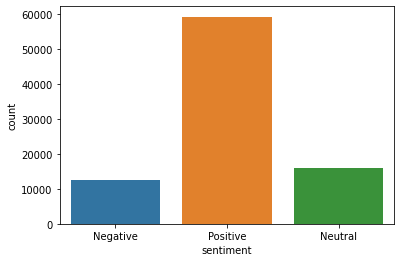

In [83]:
plot_sentiment(fg_df_text)

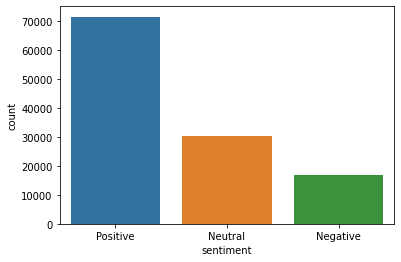

In [84]:
plot_sentiment(csgo_df_text)

In [ ]:
#extract aspect and words in reviews 

In [42]:
!pip install stanza

     |████████████████████████████████| 235kB 10.7MB/s 


In [46]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer 
import stanza

# Make sure you have downloaded the StanfordNLP English model and other essential tools using,
stanza.download('en')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')



2020-11-23 08:44:27,813 : INFO : Downloading default packages for language: en (English)...
2020-11-23 08:48:12,648 : INFO : Finished downloading models and saved to /root/stanza_resources.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [47]:
nlp = stanza.Pipeline()





2020-11-23 08:48:23,556 : INFO : Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | ewt       |
| pos       | ewt       |
| lemma     | ewt       |
| depparse  | ewt       |
| sentiment | sstplus   |
| ner       | ontonotes |

2020-11-23 08:48:23,559 : INFO : Use device: cpu
2020-11-23 08:48:23,561 : INFO : Loading: tokenize
2020-11-23 08:48:23,644 : INFO : Loading: pos
2020-11-23 08:48:24,782 : INFO : Loading: lemma
2020-11-23 08:48:24,822 : INFO : Loading: depparse
2020-11-23 08:48:26,035 : INFO : Loading: sentiment
2020-11-23 08:48:27,387 : INFO : Loading: ner
2020-11-23 08:48:28,109 : INFO : Done loading processors!


In [58]:
def aspect_sentiment_analysis(txt, stop_words, nlp):
    
    #txt = txt.lower() # LowerCasing the given Text
    #sentList = nltk.sent_tokenize(txt) # Splitting the text into sentences
    sentList = txt

    fcluster = []
    totalfeatureList = []
    finalcluster = []
    dic = {}

    for line in sentList:
        newtaggedList = []
        txt_list = nltk.word_tokenize(line) # Splitting up into words
        #txt_list = line.split(" ")
        taggedList = nltk.pos_tag(txt_list) # Doing Part-of-Speech Tagging to each word

        newwordList = []
        flag = 0
        for i in range(0,len(taggedList)-1):
            if(taggedList[i][1]=="NN" and taggedList[i+1][1]=="NN"): # If two consecutive words are Nouns then they are joined together
                newwordList.append(taggedList[i][0]+taggedList[i+1][0])
                flag=1
            else:
                if(flag==1):
                    flag=0
                    continue
                newwordList.append(taggedList[i][0])
                if(i==len(taggedList)-2):
                    newwordList.append(taggedList[i+1][0])

        finaltxt = ' '.join(word for word in newwordList) 
        new_txt_list = nltk.word_tokenize(finaltxt)
        wordsList = [w for w in new_txt_list if not w in stop_words]
        taggedList = nltk.pos_tag(wordsList)

        doc = nlp(finaltxt) # Object of Stanford NLP Pipeleine
        print(doc)
        # Getting the dependency relations betwen the words
        dep_node = []
        for dep_edge in doc.sentences[0].dependencies:
            print("deep: ", type(dep_edge[0]))
            dep_node.append([dep_edge[2].text, dep_edge[0].index, dep_edge[1]])

        # Coverting it into appropriate format
        for i in range(0, len(dep_node)):
            if (int(dep_node[i][1]) != 0):
                dep_node[i][1] = newwordList[(int(dep_node[i][1]) - 1)]

        featureList = []
        categories = []
        for i in taggedList:
            if(i[1]=='JJ' or i[1]=='NN' or i[1]=='JJR' or i[1]=='NNS' or i[1]=='RB'):
                featureList.append(list(i)) # For features for each sentence
                totalfeatureList.append(list(i)) # Stores the features of all the sentences in the text
                categories.append(i[0])

        for i in featureList:
            filist = []
            for j in dep_node:
                if((j[0]==i[0] or j[1]==i[0]) and (j[2] in ["nsubj", "acl:relcl", "obj", "dobj", "agent", "advmod", "amod", "neg", "prep_of", "acomp", "xcomp", "compound"])):
                    if(j[0]==i[0]):
                        filist.append(j[1])
                    else:
                        filist.append(j[0])
            fcluster.append([i[0], filist])
            
    for i in totalfeatureList:
        dic[i[0]] = i[1]
    
    for i in fcluster:
        if(dic[i[0]]=="NN"):
            finalcluster.append(i)
        
    return(finalcluster)

nlp = stanza.Pipeline()
stop_words = set(stopwords.words('english'))
txt = fg_df_text#

print(aspect_sentiment_analysis(txt, stop_words, nlp))

2020-11-23 08:57:07,785 : INFO : Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | ewt       |
| pos       | ewt       |
| lemma     | ewt       |
| depparse  | ewt       |
| sentiment | sstplus   |
| ner       | ontonotes |

2020-11-23 08:57:07,786 : INFO : Use device: cpu
2020-11-23 08:57:07,787 : INFO : Loading: tokenize
2020-11-23 08:57:07,798 : INFO : Loading: pos
2020-11-23 08:57:08,841 : INFO : Loading: lemma
2020-11-23 08:57:08,875 : INFO : Loading: depparse
2020-11-23 08:57:10,080 : INFO : Loading: sentiment
2020-11-23 08:57:11,360 : INFO : Loading: ner
2020-11-23 08:57:12,061 : INFO : Done loading processors!


[
  [
    {
      "id": 1,
      "text": "ow",
      "lemma": "ow",
      "upos": "INTJ",
      "xpos": "UH",
      "head": 2,
      "deprel": "discourse",
      "misc": "start_char=0|end_char=2",
      "ner": "O"
    },
    {
      "id": 2,
      "text": "fell",
      "lemma": "fall",
      "upos": "VERB",
      "xpos": "VBD",
      "feats": "Mood=Ind|Tense=Past|VerbForm=Fin",
      "head": 0,
      "deprel": "root",
      "misc": "start_char=3|end_char=7",
      "ner": "O"
    },
    {
      "id": 3,
      "text": "that",
      "lemma": "that",
      "upos": "PRON",
      "xpos": "DT",
      "feats": "Number=Sing|PronType=Dem",
      "head": 6,
      "deprel": "nsubj",
      "misc": "start_char=8|end_char=12",
      "ner": "O"
    },
    {
      "id": 4,
      "text": "s",
      "lemma": "be",
      "upos": "AUX",
      "xpos": "VBZ",
      "feats": "Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin",
      "head": 6,
      "deprel": "cop",
      "misc": "start_char=12|end_char=1

AttributeError: ignored